### Step 1: Import Necessary Libraries

######### pip install wordcloud nltk textblob

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string
import re

### Step 2: Load the CSV File

In [78]:
# Load your CSV file (replace 'your_file.csv' with your actual file name)
df = pd.read_csv("/Users/kaiyang/Desktop/debatepolitics_posts_full.csv")

# Check the first few rows
print(df.head())

# Assuming your column with titles is called 'title'
titles = df['title'].dropna()  # Remove missing values if any

                                               title  \
0  For some Latinos, ‘prosperity gospel’ led them...   
1                    How the GOP is on Self-Destruct   
2     Kamala's Been On A Drinking Binge Since Losing   
3                                        The Victory   
4                 It Must Really Suck For You People   

                                                 url replies views  
0  https://debatepolitics.com/threads/for-some-la...      48    2K  
1  https://debatepolitics.com/threads/how-the-gop...       2   174  
2  https://debatepolitics.com/threads/kamalas-bee...     187    2K  
3  https://debatepolitics.com/threads/the-victory...     182    2K  
4  https://debatepolitics.com/threads/it-must-rea...     290    2K  


### Step 3: Preprocess the Text

In [105]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove ALL punctuation (including smart quotes)
    
    # Replace multi-word terms (before tokenization)
    multi_word_terms = {
        "donald trump": "donald_trump",
        "kamala harris": "kamala_harris"
    }
    
    # Replace each multi-word term with a unique token
    for term, token in multi_word_terms.items():
        text = text.replace(term, token)
    
    tokens = word_tokenize(text)  # Tokenize words
    
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization
    return " ".join(lemmatized_tokens)

# Apply cleaning function to all titles
df['cleaned_title'] = df['title'].astype(str).apply(clean_text)

# Check cleaned text
print(df[['title', 'cleaned_title']].head())

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaiyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kaiyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kaiyang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               title  \
0  For some Latinos, ‘prosperity gospel’ led them...   
1                    How the GOP is on Self-Destruct   
2     Kamala's Been On A Drinking Binge Since Losing   
3                                        The Victory   
4                 It Must Really Suck For You People   

                         cleaned_title  
0   latino prosperity gospel led trump  
1                     gop selfdestruct  
2  kamalas drinking binge since losing  
3                              victory  
4              must really suck people  


,title,url,replies,views,cleaned_title,sentiment
0,"For some Latinos, ‘prosperity gospel’ led them...",https://debatepolitics.com/threads/for-some-la...,48,2K,latino prosperity gospel led trump,0.0
1,How the GOP is on Self-Destruct,https://debatepolitics.com/threads/how-the-gop...,2,174,gop selfdestruct,0.0
2,Kamala's Been On A Drinking Binge Since Losing,https://debatepolitics.com/threads/kamalas-bee...,187,2K,kamalas drinking binge since losing,0.0
3,The Victory,https://debatepolitics.com/threads/the-victory...,182,2K,victory,0.0
4,It Must Really Suck For You People,https://debatepolitics.com/threads/it-must-rea...,290,2K,must really suck people,0.2


### Step 4: Generate a Word Cloud

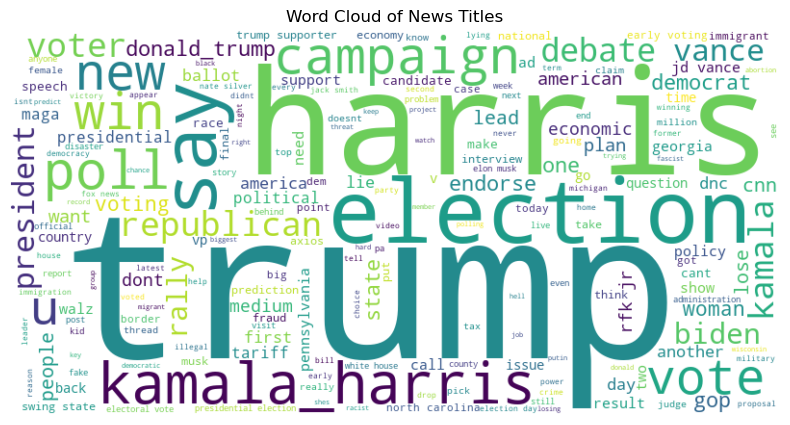

In [108]:
# Combine all titles into a single string
text = " ".join(df['cleaned_title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of News Titles")
plt.show()

### Step 5: Sentiment Analysis

In [111]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns value between -1 (negative) and 1 (positive)

# Apply sentiment function
df['sentiment'] = df['cleaned_title'].apply(get_sentiment)

# Check results
print(df[['title', 'sentiment']].head())

                                               title  sentiment
0  For some Latinos, ‘prosperity gospel’ led them...        0.0
1                    How the GOP is on Self-Destruct        0.0
2     Kamala's Been On A Drinking Binge Since Losing        0.0
3                                        The Victory        0.0
4                 It Must Really Suck For You People        0.2


### Step 6: Visualize Sentiment Distribution

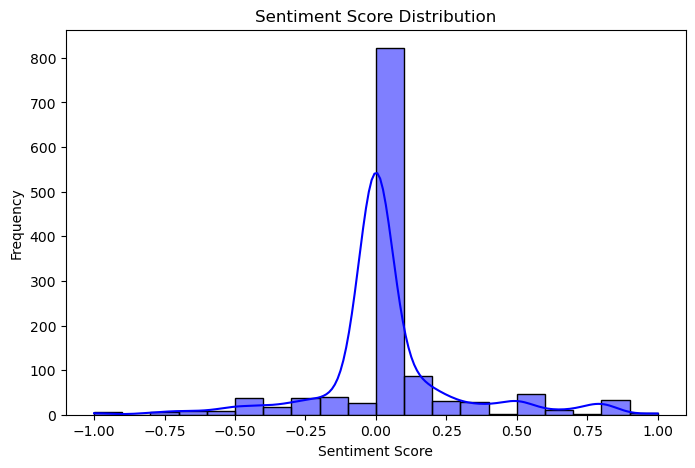

In [114]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], bins=20, kde=True, color='blue')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

### Step 7: Save Processed Data (Optional)

In [ ]:
# df.to_csv("/Users/kaiyang/Desktop/processed_news_data.csv", index=False)

# The End, thank you!